In [1]:
#Importing Libraries
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Importing Dataset
Fraud_check=pd.read_csv('Fraud_check.csv')
Fraud_check


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [12]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [13]:
Fraud_check.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [14]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df=Fraud_check.copy()
df['taxable_category'] = pd.cut(x = df['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


#Data Exploration

In [15]:
#Descriptive Statistics
df.describe()
df.info()
#Missing Values
df.isnull().sum()
#Duplicated Values
df.duplicated().sum()
#columns
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   Marital.Status    600 non-null    object  
 2   Taxable.Income    600 non-null    int64   
 3   City.Population   600 non-null    int64   
 4   Work.Experience   600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'taxable_category'],
      dtype='object')

#Data Visualization


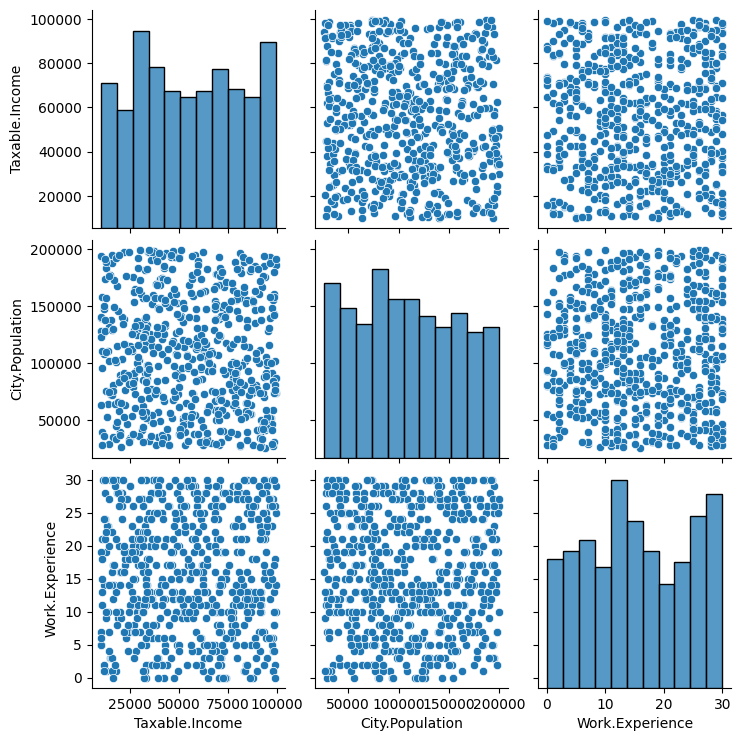

In [17]:
sns.pairplot(Fraud_check)

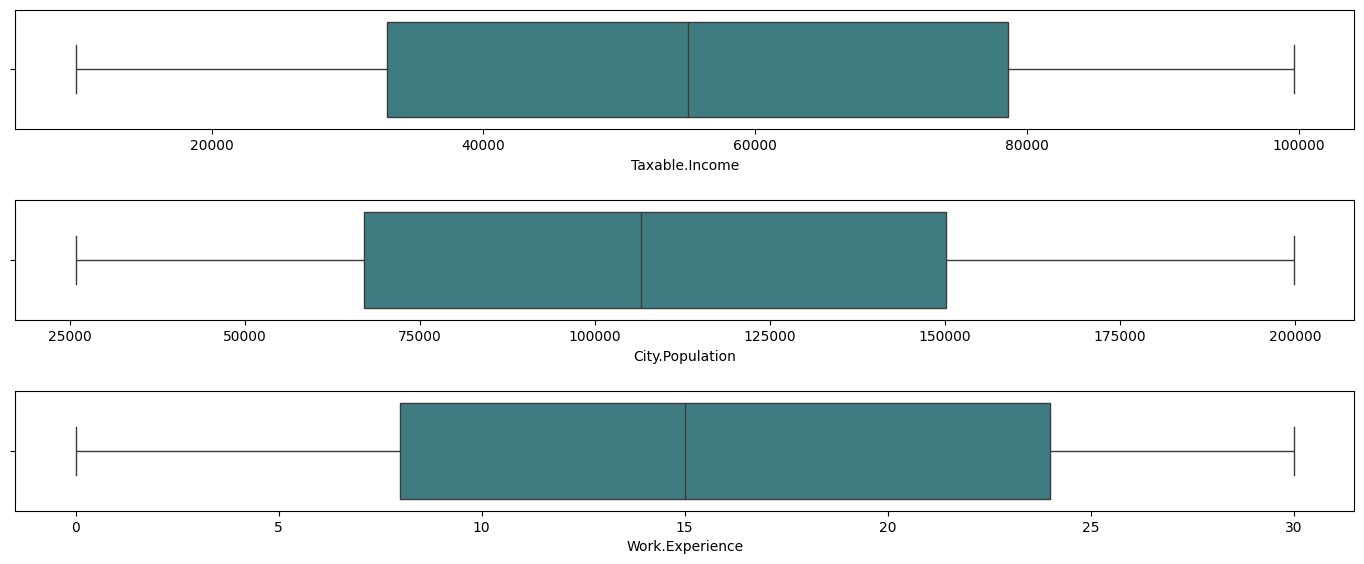

In [18]:
#Boxplot
ot=df.copy()
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: >

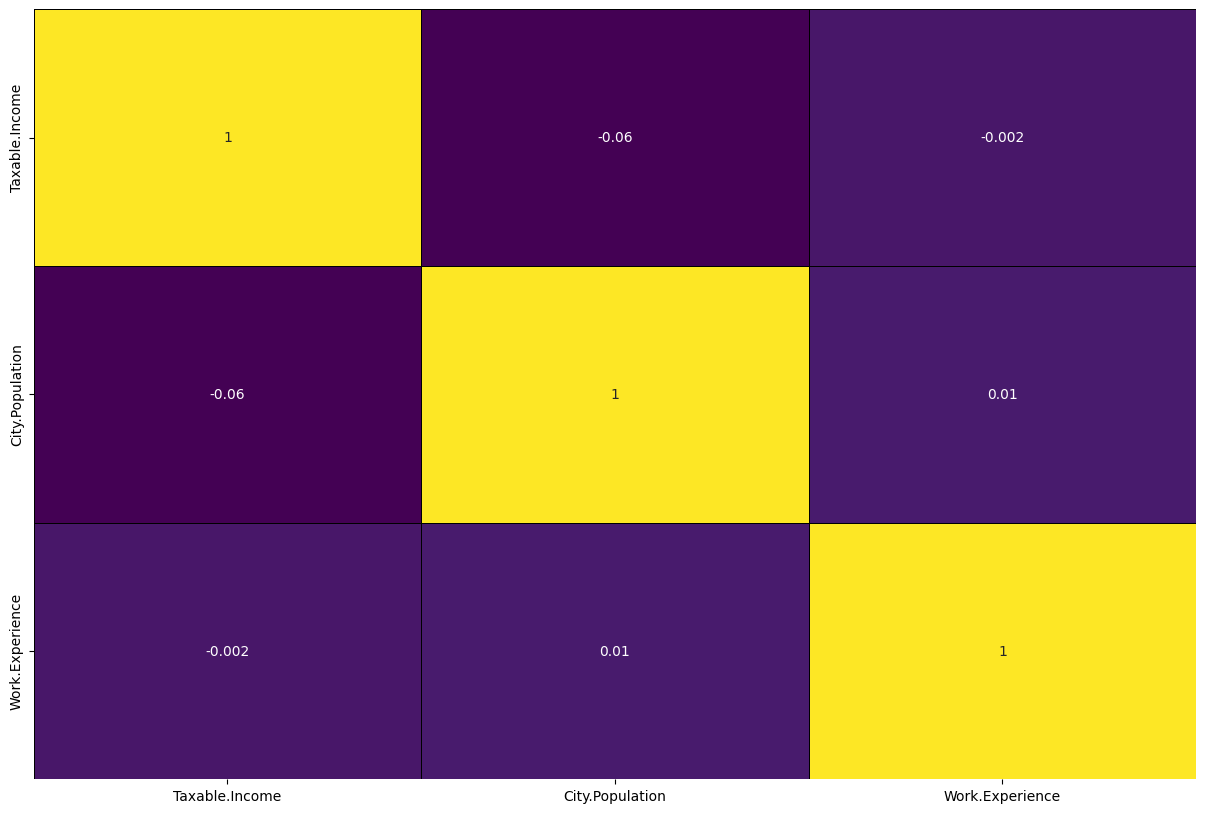

In [19]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

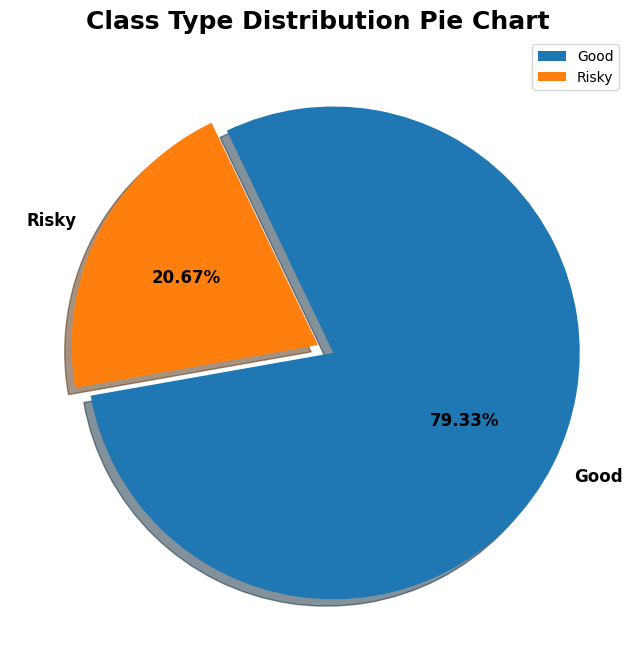

In [21]:
#piechart
plt.figure(figsize = (12,8))
plt.pie(df['taxable_category'].value_counts(),
       labels=df.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [22]:
#Data Pre-Processing

data = df.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [23]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [24]:
#importing train and test
#spltting of x and y
x = data.drop('taxable_category',axis=1)
y = data['taxable_category']


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


In [26]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
#predictions of x_train and x_tests
Y_pred_train = DT.predict(x_train)
Y_pred_test = DT.predict(x_test)

In [28]:
#Finding test and train accuracy scor
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy:", (acc1).round(2))
acc2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy:", (acc2).round(2))


Training Accuracy: 1.0
Test Accuracy: 0.63


In [29]:
#criterion='entropy'
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
#predictions of x_train and x_tests
Y_pred_train = DT.predict(x_train)
Y_pred_test = DT.predict(x_test)

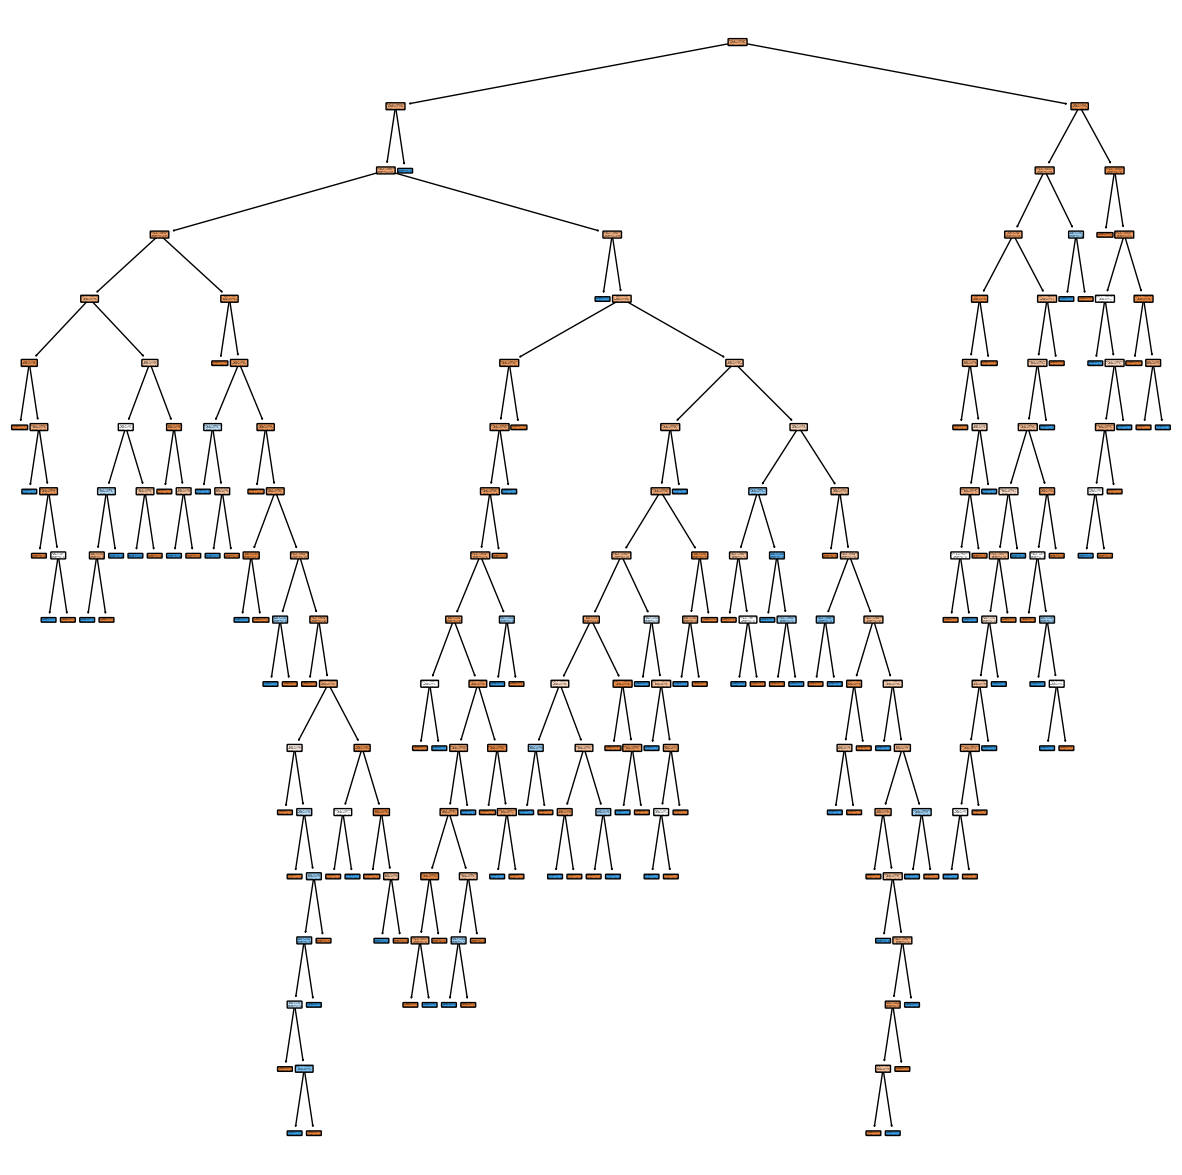

In [31]:
#Building Decision Tree Classifier
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(DT,rounded=True,filled=True)
plt.show()

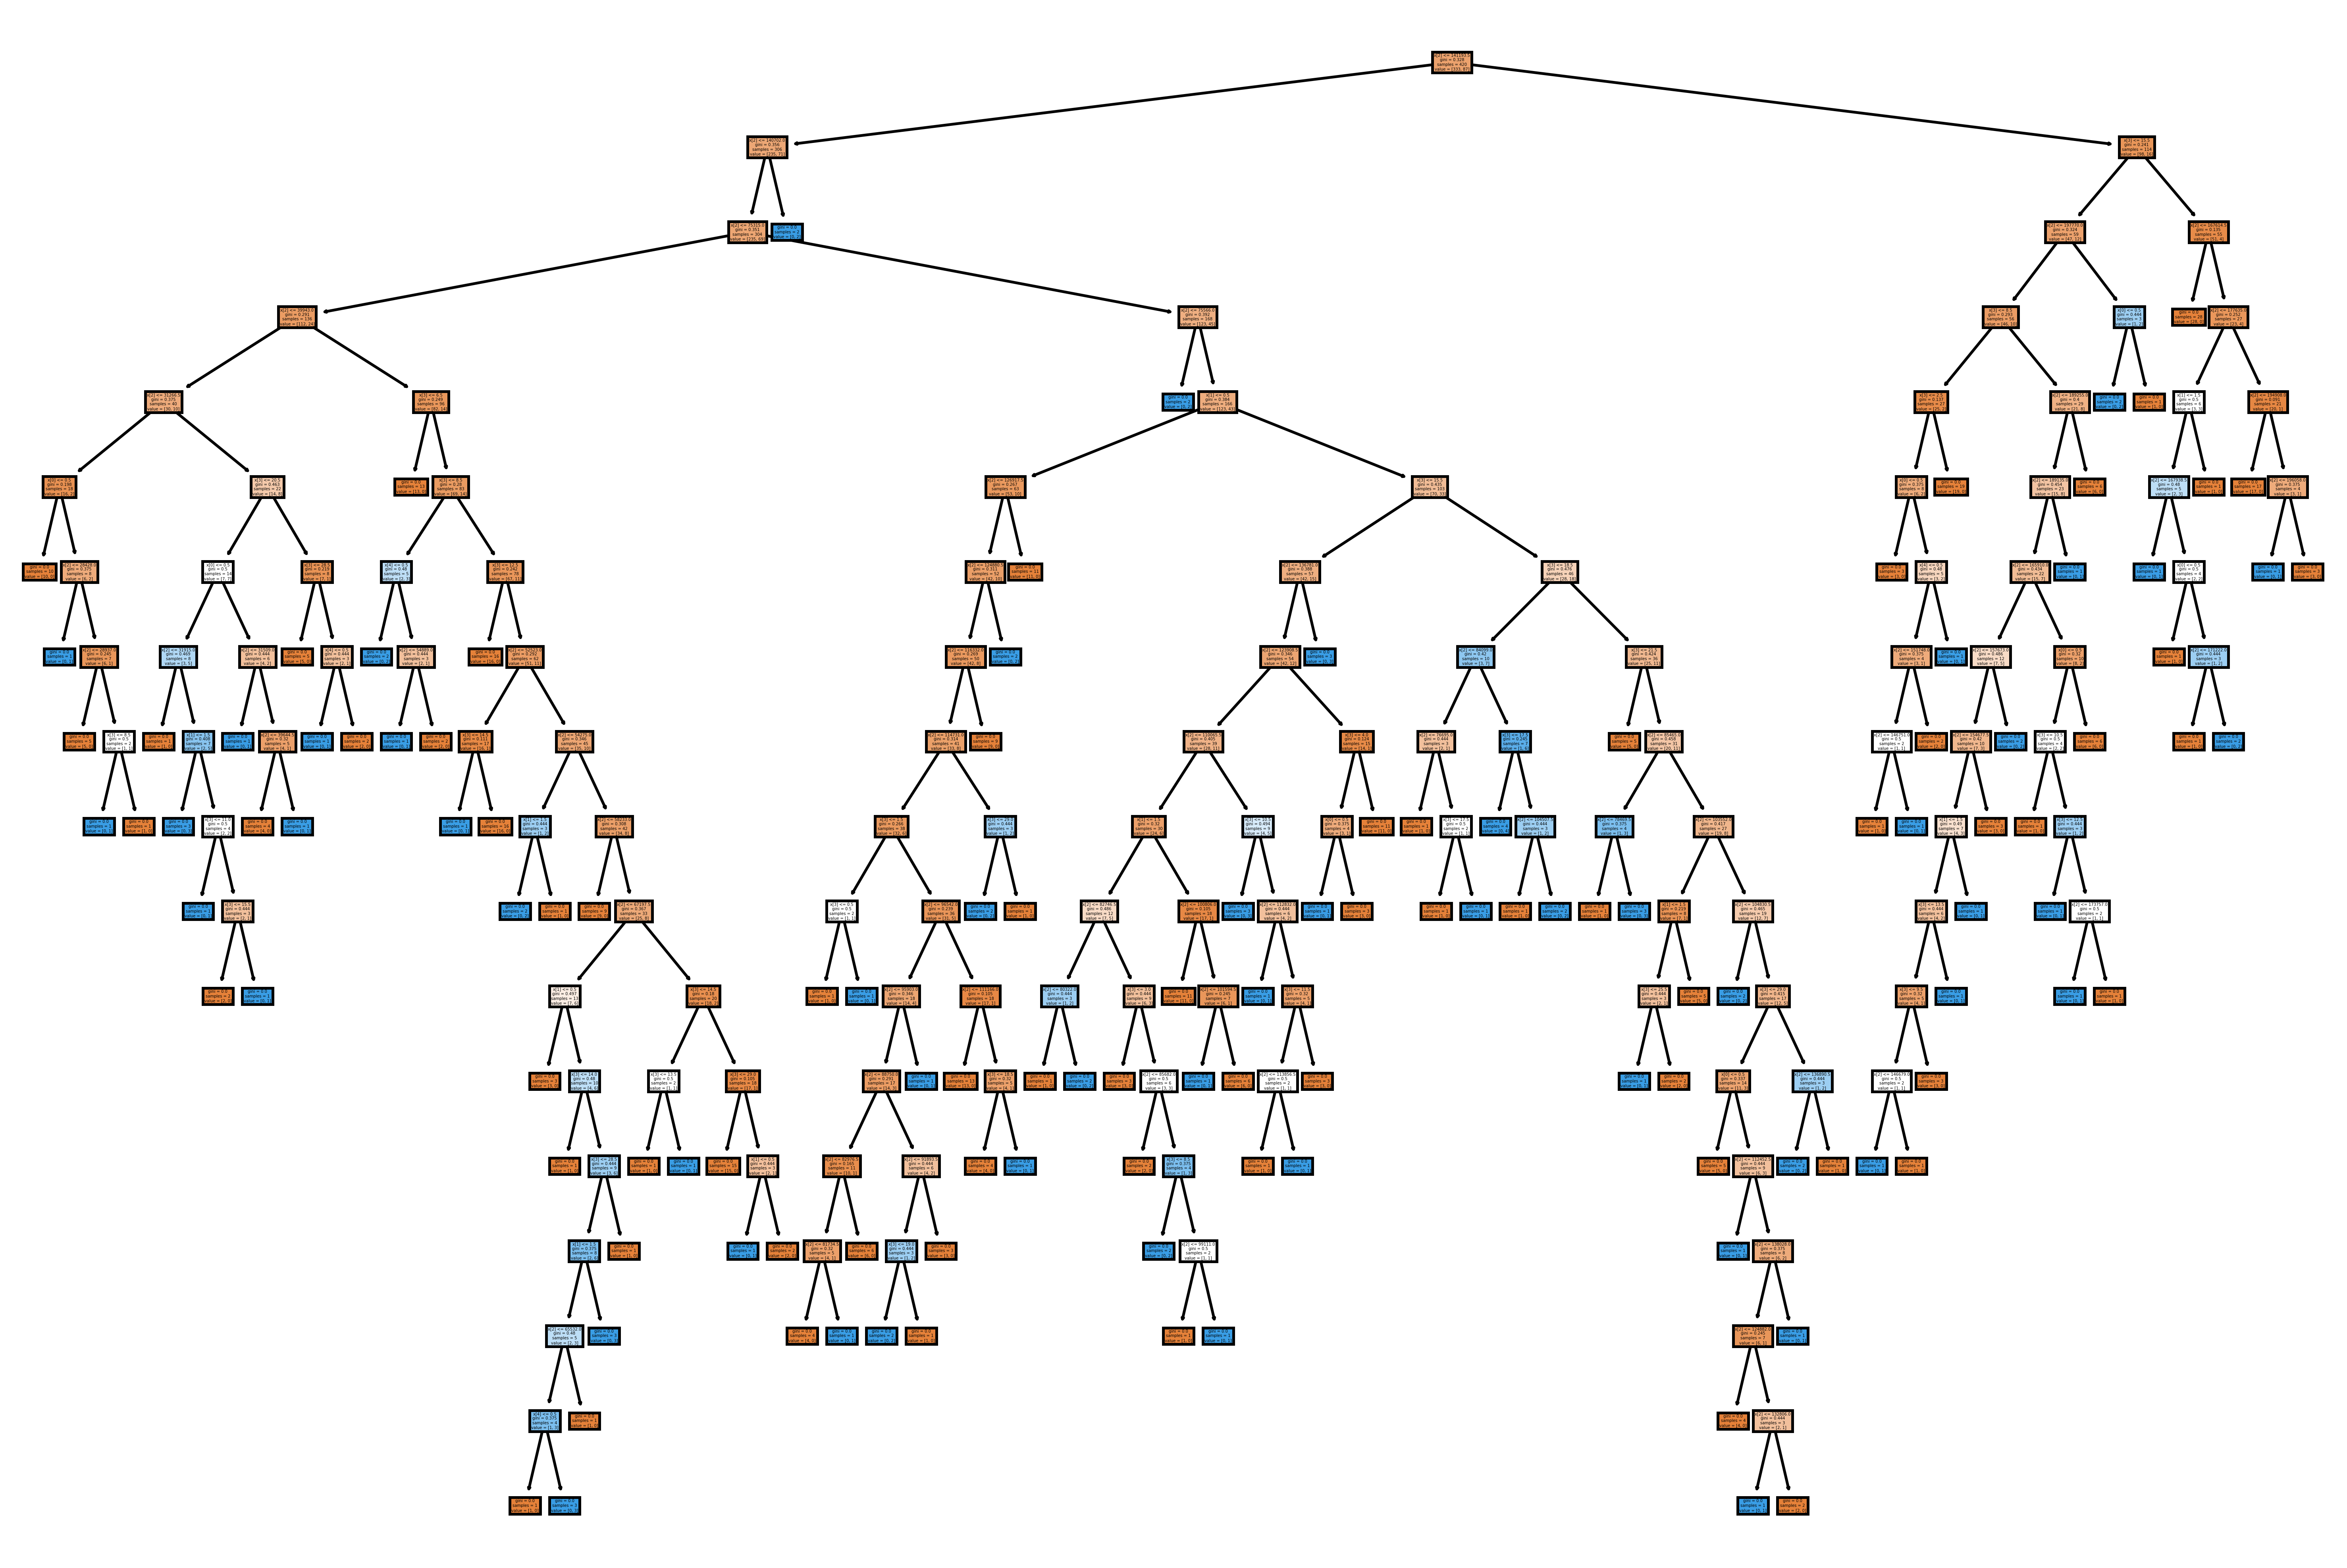

In [32]:
#Building Decision Tree Classifier using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)
DecisionTreeClassifier(random_state=0)
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()